In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import glob
import string
import statistics
from os.path import exists
from pydicom import dcmread
import datetime

In [2]:
curr_path = '/Users/madisonhunt/Desktop/SAMS_3T_Vol.csv'

vol_data = pd.DataFrame()
vol_data= pd.read_csv(curr_path)

In [3]:
vol_data.head()

,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,R-post-HC,L-PRC,L-ERC,L-PHC,L-Sub,L-ant-HC,L-CA1,L-DG/CA3,L-post-HC
0,blind046,1098.229,953.842,2371.865,327.918,2058.718,315.362,619.277,329.395,1485.231,1042.099,2395.868,436.854,1772.898,322.748,596.013,196.825
1,blind103,1202.416,1112.678,1802.886,534.736,1688.775,280.662,362.645,322.023,1299.171,1150.346,1864.927,565.018,1500.066,313.160,406.960,319.807
2,blind115,1649.606,1612.678,1826.495,495.953,2327.618,266.625,316.479,387.752,1973.102,998.184,1554.330,310.940,1858.623,217.510,374.457,371.503
3,blind169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,blind093,1577.987,1564.692,2400.032,640.353,1960.205,265.891,386.280,291.002,894.796,999.305,2781.880,586.806,1529.240,292.480,364.492,411.392


In [4]:
curr_path = '/Users/madisonhunt/Desktop/SAMS_FSL_output.csv'

fsl_data = pd.DataFrame()
fsl_data = pd.read_csv(curr_path)


In [5]:
fsl_data.head()

,Subject,gray_Volume,gray_Unnormalised-Volume,white_Volume,white_Unnormalised-Volume,brain_Volume,brain_Unnormalised-Volume,Amcode,PIDN,BlindCode,Unnamed: 10,63
0,sub-020,654816.23,482635.36,668475.75,492703.18,1323291.98,975338.54,am20,423.0,blind003,False,NaN
1,sub-028,625501.02,481856.15,682248.76,525571.90,1307749.78,1007428.05,am28,NaN,NaN,True,NaN
2,sub-029,631584.40,469990.82,603811.73,449323.91,1235396.13,919314.73,am29,NaN,NaN,True,NaN
3,sub-030,589928.03,491171.31,689791.45,574317.13,1279719.48,1065488.44,am30,NaN,NaN,True,NaN
4,sub-031,784457.06,498990.03,745925.36,474480.17,1530382.42,973470.20,am31,481.0,blind007,False,NaN


In [6]:
curr_path = ('/Users/madisonhunt/Desktop/SAMS_id_data.csv')

id_match = pd.DataFrame()
id_match = pd.read_csv(curr_path)

In [7]:
id_match.head()

,pidn,Amcode,blind_num
0,301,am24,blind009
1,303,am29,blind008
2,405,am13,blind168
3,423,am20,blind003
4,448,am25,blind004


In [8]:
curr_path = ('/Users/madisonhunt/Desktop/mst_data.csv')

mst_data = pd.DataFrame()
mst_data = pd.read_csv(curr_path)

In [9]:
mst_data.head()

,pidn,num_targ_tr,num_foil_tr,num_lure_tr,num_nr,num_nr_t,num_nr_l,num_nr_f,prop_nr,n_old_targ,...,lm2,lmpr,mmse_norm,hvltr4_norm,bvmtr4_norm,lm2_norm,immediate_recall_comp,delayed_recall_comp,recognition_comp,nr_group
0,449,63,63,63,15,5,7,3,0.078125,55,...,33.0,89.0,0.986161,0.461898,0.992866,0.338361,0.871160,0.597709,-0.311304,nr_.05
1,456,63,64,63,11,2,3,6,0.057292,50,...,37.0,86.0,0.986161,-0.076983,0.027327,0.919985,0.471109,0.290109,0.262036,nr_.05
2,457,64,64,64,2,0,0,2,0.010417,49,...,30.0,86.0,0.986161,-0.076983,0.510096,-0.097856,-0.162737,0.111752,-0.145195,nr_low
3,468,63,64,64,5,3,0,2,0.026042,38,...,18.0,62.0,-1.043887,-0.615864,-1.420982,-1.842726,-0.647130,-1.293191,-0.695494,nr_low
4,470,64,64,64,4,0,2,2,0.020833,63,...,32.0,82.0,0.986161,-1.693627,-0.455443,0.192956,0.114617,-0.652038,-0.265756,nr_low


In [10]:
data = id_match.merge(vol_data, on = 'blind_num')
data.head()

,pidn,Amcode,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,R-post-HC,L-PRC,L-ERC,L-PHC,L-Sub,L-ant-HC,L-CA1,L-DG/CA3,L-post-HC
0,301,am24,blind009,1752.664,825.370,1611.594,645.155,1668.096,245.211,406.222,93.431,1276.646,810.598,1933.987,530.674,1283.293,280.293,437.612,271.800
1,303,am29,blind008,1711.675,1181.739,1994.185,599.733,1931.036,224.900,335.318,272.908,1758.576,1330.564,2293.313,634.446,1883.397,243.734,391.082,104.879
2,405,am13,blind168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423,am20,blind003,1069.816,1185.032,2274.051,494.471,1526.620,295.427,420.984,423.199,1108.960,1246.333,2619.701,502.965,1332.377,271.793,461.605,429.477
4,448,am25,blind004,1044.048,1221.319,2035.285,594.225,1875.742,321.302,493.772,351.955,1362.396,1265.267,2102.500,612.691,1760.885,262.582,471.982,357.495


In [11]:
data = data.merge(fsl_data, on = 'Amcode')
data.head()

,pidn,Amcode,blind_num,R-PRC,R-ERC,R-PHC,R-Sub,R-ant-HC,R-CA1,R-DG/CA3,...,gray_Volume,gray_Unnormalised-Volume,white_Volume,white_Unnormalised-Volume,brain_Volume,brain_Unnormalised-Volume,PIDN,BlindCode,Unnamed: 10,63
0,303,am29,blind008,1711.675,1181.739,1994.185,599.733,1931.036,224.900,335.318,...,631584.40,469990.82,603811.73,449323.91,1235396.13,919314.73,NaN,NaN,True,NaN
1,423,am20,blind003,1069.816,1185.032,2274.051,494.471,1526.620,295.427,420.984,...,654816.23,482635.36,668475.75,492703.18,1323291.98,975338.54,423.0,blind003,False,NaN
2,457,am34,blind010,1601.589,1279.942,1987.861,577.931,1709.789,260.346,358.206,...,609064.80,452423.06,661479.13,491357.26,1270543.93,943780.32,457.0,blind010,False,NaN
3,472,am35,blind013,1473.480,1214.975,1165.490,443.152,1387.435,191.294,425.426,...,626476.31,450413.04,665998.24,478827.83,1292474.55,929240.87,NaN,NaN,True,NaN
4,474,am44,blind015,968.635,1087.914,1987.862,515.153,1350.106,227.110,443.511,...,663982.95,468972.53,757419.21,534966.76,1421402.16,1003939.29,474.0,blind015,False,NaN


In [12]:
volumes = pd.DataFrame()
volumes['pidn'] = data['pidn']

volumes['r-prc-vol'] = data['R-PRC']
volumes['r-erc-vol'] = data['R-ERC']
volumes['r-phc-vol'] = data['R-PHC']
volumes['r-sub-vol'] = data['R-Sub']
volumes['r-ant-vol'] = data['R-ant-HC']
volumes['r-ca1-vol'] = data['R-CA1']
volumes['r-dg-ca3-vol'] = data['R-DG/CA3']
volumes['r-post-vol'] = data['R-post-HC']
volumes['l-prc-vol'] = data['L-PRC']
volumes['l-erc-vol'] = data['L-ERC']
volumes['l-phc-vol'] = data['L-PHC']
volumes['l-sub-vol'] = data['L-Sub']
volumes['l-ant-vol'] = data['L-ant-HC']
volumes['l-ca1-vol'] = data['L-CA1']
volumes['l-dg-ca3-vol'] = data['L-DG/CA3']
volumes['l-post-vol'] = data['L-post-HC']
volumes['brain_vol'] = data['brain_Volume']

In [13]:
print(volumes)

     pidn  r-prc-vol  r-erc-vol  r-phc-vol  r-sub-vol  r-ant-vol  r-ca1-vol  \
0     303   1711.675   1181.739   1994.185    599.733   1931.036    224.900   
1     423   1069.816   1185.032   2274.051    494.471   1526.620    295.427   
2     457   1601.589   1279.942   1987.861    577.931   1709.789    260.346   
3     472   1473.480   1214.975   1165.490    443.152   1387.435    191.294   
4     474    968.635   1087.914   1987.862    515.153   1350.106    227.110   
5     475   1042.850   1208.657   2001.504    435.382   1503.713    278.807   
6     477   1052.073   1210.862   2684.281    727.847   1650.672    356.353   
7     478   1387.081   1472.020   2346.885    564.656   1556.589    304.670   
8     479   1685.028   1296.545   1384.064    259.604   1511.836    183.533   
9     481    884.432    820.916   1867.832    591.222   1585.331    279.547   
10    482   1398.847   1404.756   1887.041    647.355   1377.798    303.551   
11    488    973.053   1373.352   2088.278    668.76

In [14]:
volumes = volumes.merge(mst_data, on = 'pidn')

In [15]:
volumes.head()

,pidn,r-prc-vol,r-erc-vol,r-phc-vol,r-sub-vol,r-ant-vol,r-ca1-vol,r-dg-ca3-vol,r-post-vol,l-prc-vol,...,lm2,lmpr,mmse_norm,hvltr4_norm,bvmtr4_norm,lm2_norm,immediate_recall_comp,delayed_recall_comp,recognition_comp,nr_group
0,457,1601.589,1279.942,1987.861,577.931,1709.789,260.346,358.206,346.020,1478.248,...,30.0,86.0,0.986161,-0.076983,0.510096,-0.097856,-0.162737,0.111752,-0.145195,nr_low
1,472,1473.480,1214.975,1165.490,443.152,1387.435,191.294,425.426,350.459,1544.754,...,30.0,94.0,0.986161,1.000779,0.027327,-0.097856,0.331262,0.310083,0.307584,nr_.05
2,474,968.635,1087.914,1987.862,515.153,1350.106,227.110,443.511,418.769,972.697,...,44.0,100.0,0.986161,-0.076983,0.992866,1.937825,0.742234,0.951236,0.594253,nr_low
3,475,1042.850,1208.657,2001.504,435.382,1503.713,278.807,458.647,199.412,1335.690,...,18.0,67.0,-1.043887,-0.615864,-1.903752,-1.842726,-1.179196,-1.454114,-0.477413,nr_.05
4,477,1052.073,1210.862,2684.281,727.847,1650.672,356.353,533.237,584.567,1025.115,...,30.0,94.0,-0.028863,-0.615864,0.992866,-0.097856,0.179932,0.093049,0.141475,nr_low


AttributeError: 'Series' object has no attribute 'reshape'

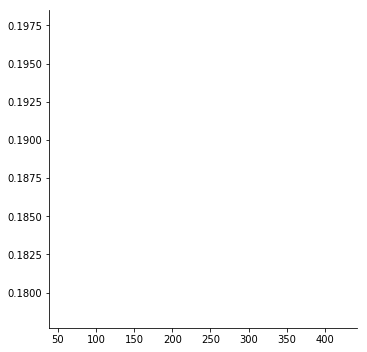

In [16]:
sns.lmplot(x='r-ca1-vol', y = 'bps', data = volumes, x_partial = 'brain_vol')